Benedick Asdyo(2101631090)

#1. You are expected to implement an instance retrieval algorithm in python notebook using bag of visual words (BOVW) method. In order to do so, here are all the tasks that may be carried out:

Import library

In [ ]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC



Memberi ijin jupyter notebook atau google colab untuk mengakses file di suatu google drive


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Path direktori pada google drive yang dilihat seperti pada gambar dibawah :




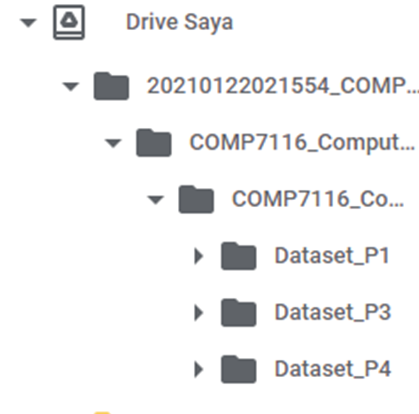 

In [ ]:
trainPath = 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/train'
trainListDir = os.listdir(trainPath)
imageList = []
imageClassId = []

Melihat file dataset yang diberikan dapat disimpulkan terdapat 5 macam gambar dengan 3 digit awal dari nama file memberitahu gambar tersebut masuk ke jenis gambar apa seperti pada gambar di bawah :

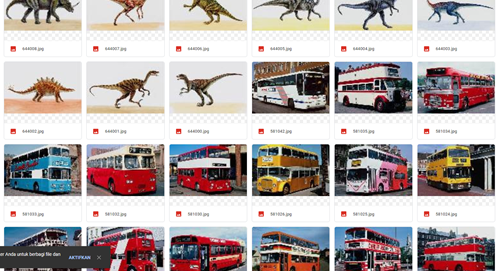

Dimana :

644 -> Dinosaurus

581 -> Bus

443 -> Boneka

113 -> Kuda

840 -> Bunga



In [ ]:
for idx, trainDir in enumerate (trainListDir):
  imagePath = trainPath+'/'+trainDir  
  imageList.append(imagePath)
imageList.sort()
imageList

['gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/train/113003.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/train/113016.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/train/113025.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/train/113034.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/train/113038.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestio

##a. [7.5%] Collect all the SIFT descriptors from the image datasets provided (Dataset_P1) and cluster them using k-Means into k number of clusters where k is a number you set (try various different values of k in order to improve the precision). The center of these clusters are the "visual words" i.e. representative features of your image datasets. The output of this clustering process is then called a visual codebook or sometimes referred to as dictionary. Draw the histogram of your k final visual codebook and save it in pickle format. You may need to normalize your histogram.

Untuk menggunakan SIFT atau SURF image ditector dibutuhkan opencv versi contrib

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

Mengaplikasikan sift untuk mendapatkan feature diimage 

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()



In [ ]:
from google.colab.patches import cv2_imshow
descList = []
images =[]
for imgPath in imageList:
  img = cv2.imread(imgPath)
  images.append(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  keypoints, descriptors = sift.detectAndCompute(img, None)
  descList.append(descriptors)
descList

[array([[ 19.,   2.,   6., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   8.,  10.,   7.],
        [  5.,  89.,  68., ...,   6.,   3.,   3.],
        ...,
        [  6.,  11.,  20., ...,   0.,   9., 102.],
        [  0.,   0.,   0., ...,  25.,   4.,  29.],
        [  2.,  15.,  33., ..., 115.,  18.,   0.]], dtype=float32),
 array([[123.,  85.,   7., ...,   0.,   0.,   0.],
        [ 93.,  36.,   5., ...,   4.,   9.,   1.],
        [ 56.,  31.,   4., ...,   4.,   6.,   8.],
        ...,
        [  8.,  59.,  10., ...,   0.,   0.,  31.],
        [ 54.,  20.,   2., ...,   1.,  42.,  37.],
        [119.,  49.,   9., ...,   4.,  67.,  46.]], dtype=float32),
 array([[ 19.,  52.,  33., ...,  11.,   0.,   1.],
        [ 12.,  32.,  25., ...,  28., 130.,  80.],
        [  1.,   4.,   5., ...,  59.,  10.,  10.],
        ...,
        [ 29.,   4.,   0., ...,   0.,   0.,   0.],
        [  6.,   3.,   0., ..., 125.,  23.,   6.],
        [  2.,  20.,  70., ...,   0.,   0.,  26.]], dtype=fl

In [ ]:
stack = descList[0]
for desc in descList[1:]:
  stack = np.vstack((stack,desc))
stack = np.float32(stack)
stack

array([[ 19.,   2.,   6., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   8.,  10.,   7.],
       [  5.,  89.,  68., ...,   6.,   3.,   3.],
       ...,
       [ 41.,  38.,   4., ...,  19.,  10.,  84.],
       [ 16.,   0.,   0., ...,  45.,   4.,   3.],
       [  0.,   0.,   0., ...,   2.,  90., 144.]], dtype=float32)

Group descriptor menggunakan k-means clustering

In [ ]:
centroids, _ = kmeans(stack,100,1)
imFeatures = np.zeros((len(imageList),len(centroids)),"float32")
for i in range(0,len(imageList)):
  words, _ = vq(descList[i],centroids)
  print(descList[i])
  for w in words:
    imFeatures[i][w]+=1
stdScaler = StandardScaler().fit(imFeatures)
imFeatures = stdScaler.transform(imFeatures)
imFeatures

[[ 19.   2.   6. ...   0.   0.   0.]
 [  0.   0.   0. ...   8.  10.   7.]
 [  5.  89.  68. ...   6.   3.   3.]
 ...
 [  6.  11.  20. ...   0.   9. 102.]
 [  0.   0.   0. ...  25.   4.  29.]
 [  2.  15.  33. ... 115.  18.   0.]]
[[123.  85.   7. ...   0.   0.   0.]
 [ 93.  36.   5. ...   4.   9.   1.]
 [ 56.  31.   4. ...   4.   6.   8.]
 ...
 [  8.  59.  10. ...   0.   0.  31.]
 [ 54.  20.   2. ...   1.  42.  37.]
 [119.  49.   9. ...   4.  67.  46.]]
[[ 19.  52.  33. ...  11.   0.   1.]
 [ 12.  32.  25. ...  28. 130.  80.]
 [  1.   4.   5. ...  59.  10.  10.]
 ...
 [ 29.   4.   0. ...   0.   0.   0.]
 [  6.   3.   0. ... 125.  23.   6.]
 [  2.  20.  70. ...   0.   0.  26.]]
[[  0.   0.   0. ...  37.   9.   4.]
 [ 46.   1.   0. ...  16.  13.   6.]
 [ 11.  17.   6. ...  28.  12.  17.]
 ...
 [ 23.   8.   6. ...   2.   1.   3.]
 [  9.  14.  10. ...   2.   0.   0.]
 [  4. 121. 121. ...   0.   4.   3.]]
[[ 31.   9.  23. ...   4.   8.   0.]
 [  0.   1.   8. ...   8.   8.  11.]
 [  0.   0.   

array([[ 0.6499337 , -0.65143037,  0.52671146, ..., -0.6570943 ,
        -0.64517915,  0.13608277],
       [ 0.6499337 , -0.65143037, -0.7475904 , ...,  2.241851  ,
        -0.64517915, -0.5443311 ],
       [-0.7427814 ,  0.7057162 ,  0.52671146, ..., -0.6570943 ,
         0.59555   ,  0.13608277],
       ...,
       [-0.7427814 ,  1.3842895 ,  1.8010134 , ..., -0.6570943 ,
        -0.64517915,  1.4969105 ],
       [-0.7427814 , -0.65143037, -0.7475904 , ..., -0.6570943 ,
         0.59555   ,  0.13608277],
       [-0.7427814 , -0.65143037, -0.7475904 , ..., -0.6570943 ,
         3.0770082 ,  0.13608277]], dtype=float32)

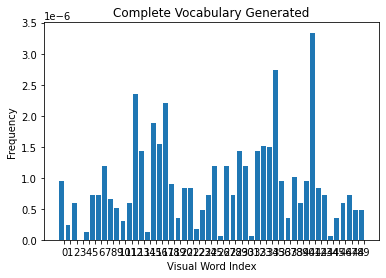

<Figure size 432x288 with 0 Axes>

In [ ]:
import pickle as pkl
noWords = 50
train_histogram = plt.figure()
train_histogram.canvas.set_window_title("Train Images")
train_xscalar = np.arange(noWords)
train_yscalar = np.array([abs(np.sum(imFeatures[:, h], dtype=np.float32)) for h in range(noWords)])

plt.bar(train_xscalar, train_yscalar)
plt.xlabel("Visual Word Index")
plt.ylabel("Frequency")
plt.title("Complete Vocabulary Generated")
plt.xticks(train_xscalar + 0.4, train_xscalar)
histo = plt.figure()
filename = 'histo.sav'
pkl.dump(histo, open(filename, 'wb'))
plt.show()

## b. [5%] Load an image from list of image queries and extract its SIFT descriptors. Based on SIFT descriptors, find the visual words of the corresponding query image and draw the histogram of it (histogram of visual words of the query image).

Step yang dilakukan sama perbedaanya hanya terdapat disini

In [ ]:
queryPath = 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/Query'
queryListDir = os.listdir(queryPath)
queryList = []
for idx, imgQDir in enumerate (queryListDir):
  tmp = queryPath+'/'+imgQDir  
  queryList.append(tmp)
queryList.sort()
queryList

['gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/Query/Q1.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/Query/Q2.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/Query/Q3.jpg',
 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P1/Query/Q4.jpg']

In [ ]:
descQList = []
imagesQ =[]
for q in queryList:
  imgQ = cv2.imread(q)
  imagesQ.append(imgQ)
  imgQ = cv2.cvtColor(imgQ, cv2.COLOR_BGR2GRAY)
  keypoints, descriptors = sift.detectAndCompute(imgQ, None)
  descQList.append(descriptors)
descQList

[array([[  6.,  27.,  69., ...,   1.,   3.,   0.],
        [119., 151.,  23., ...,   2.,   5.,   7.],
        [ 22.,  45.,   8., ...,  18.,   7.,   2.],
        ...,
        [  5.,   3.,  23., ...,  15.,  11.,  18.],
        [  2.,   1.,   3., ...,   2.,   7.,   9.],
        [  1.,  18.,  52., ...,   6.,   0.,   0.]], dtype=float32),
 array([[13., 58., 35., ..., 35.,  1.,  1.],
        [ 0.,  0.,  0., ..., 78., 44.,  9.],
        [21.,  8.,  1., ...,  0.,  0., 25.],
        ...,
        [ 3.,  1., 18., ...,  0.,  0.,  0.],
        [53., 98., 18., ...,  0.,  0.,  0.],
        [75., 50.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 6.,  0.,  0., ...,  0., 48., 55.],
        [ 0.,  0.,  0., ...,  2., 15., 33.],
        [ 1.,  0.,  9., ...,  0.,  0.,  2.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  2.],
        [ 1.,  1., 11., ...,  0.,  0.,  0.],
        [11., 37., 11., ...,  0.,  0.,  1.]], dtype=float32),
 array([[  6.,  21.,  26., ...,   3.,   5.,  11.],
        [105.

In [ ]:
stackQ = descQList[0]
for descQ in descQList[1:]:
  stackQ = np.vstack((stackQ,descQ))
stackQ = np.float32(stackQ)
stackQ

array([[  6.,  27.,  69., ...,   1.,   3.,   0.],
       [119., 151.,  23., ...,   2.,   5.,   7.],
       [ 22.,  45.,   8., ...,  18.,   7.,   2.],
       ...,
       [  8.,  54., 126., ...,   2.,   0.,   0.],
       [  5.,   0.,   0., ...,  32.,  26.,  25.],
       [  0.,   0.,   1., ...,  20.,   1.,   2.]], dtype=float32)

In [ ]:
centroids, _ = kmeans(stack,100,1)
imQFeatures = np.zeros((len(queryList),len(centroids)),"float32")
for i in range(0,len(queryList)):
  words, _ = vq(descQList[i],centroids)
  print(descQList[i])
  for w in words:
    imQFeatures[i][w]+=1
stdScaler = StandardScaler().fit(imQFeatures)
imQFeatures = stdScaler.transform(imQFeatures)
imQFeatures

[[  6.  27.  69. ...   1.   3.   0.]
 [119. 151.  23. ...   2.   5.   7.]
 [ 22.  45.   8. ...  18.   7.   2.]
 ...
 [  5.   3.  23. ...  15.  11.  18.]
 [  2.   1.   3. ...   2.   7.   9.]
 [  1.  18.  52. ...   6.   0.   0.]]
[[13. 58. 35. ... 35.  1.  1.]
 [ 0.  0.  0. ... 78. 44.  9.]
 [21.  8.  1. ...  0.  0. 25.]
 ...
 [ 3.  1. 18. ...  0.  0.  0.]
 [53. 98. 18. ...  0.  0.  0.]
 [75. 50.  0. ...  0.  0.  0.]]
[[ 6.  0.  0. ...  0. 48. 55.]
 [ 0.  0.  0. ...  2. 15. 33.]
 [ 1.  0.  9. ...  0.  0.  2.]
 ...
 [ 0.  0.  0. ...  0.  0.  2.]
 [ 1.  1. 11. ...  0.  0.  0.]
 [11. 37. 11. ...  0.  0.  1.]]
[[  6.  21.  26. ...   3.   5.  11.]
 [105. 143.   0. ...   0.   0.   1.]
 [ 47. 153.   2. ...   0.   0.   0.]
 ...
 [  8.  54. 126. ...   2.   0.   0.]
 [  5.   0.   0. ...  32.  26.  25.]
 [  0.   0.   1. ...  20.   1.   2.]]


array([[ 0.        ,  1.        ,  1.7320508 ,  0.        ,  1.7320508 ,
         1.7320508 ,  0.30151135,  0.        ,  0.        , -0.57735026,
         1.5075567 ,  1.        ,  1.7320508 ,  1.5075567 ,  1.5075567 ,
         0.57735026,  0.        ,  0.57735026, -0.57735026,  1.        ,
        -0.57735026,  0.57735026,  0.        , -0.57735026,  1.5075567 ,
         1.7320508 ,  1.5075567 ,  1.5075567 ,  0.57735026, -0.57735026,
        -0.57735026,  0.        , -0.57735026, -0.57735026,  1.        ,
         1.6329932 ,  0.57735026,  1.7320508 ,  0.90453404, -0.57735026,
        -0.57735026, -0.57735026, -0.57735026,  0.30151135,  1.7320508 ,
        -0.57735026, -1.        ,  1.        ,  1.7320508 ,  1.7320508 ,
         1.5075567 ,  0.30151135,  1.7320508 , -1.        ,  1.        ,
        -0.57735026, -1.4142135 ,  1.7320508 ,  0.57735026,  1.5075567 ,
         1.7320508 ,  1.        , -0.90453404,  1.7320508 ,  1.7320508 ,
         0.90453404, -0.15249857,  1.        ,  1.7

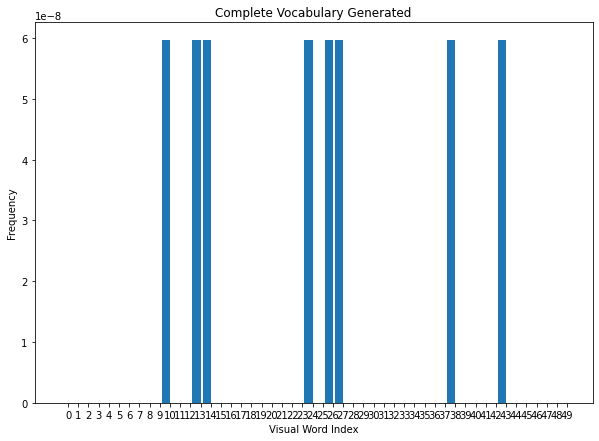

In [ ]:
noWords = 50
train_histogram = plt.figure()
train_histogram.canvas.set_window_title("Train Images")
train_xscalar = np.arange(noWords)
train_yscalar = np.array([abs(np.sum(imQFeatures[:, h], dtype=np.float32)) for h in range(noWords)])

plt.bar(train_xscalar, train_yscalar)
plt.xlabel("Visual Word Index")
plt.ylabel("Frequency")
plt.title("Complete Vocabulary Generated")
plt.xticks(train_xscalar + 0.4, train_xscalar)
plt.show()

## c. [7.5%] Based on compact image features obtained from (a) and (b), Using cosine similarity retrieve similar images using Q1, Q2, Q3, and Q4 respectively (you can find Q’s from Dataset_P1). Make sure every single query will return 15 most similar images organized in order. Draw the average precision vs recall curve.

In [ ]:

def cosine_similarity(v1, v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

def sort_result(result): 
    n = len(result)
    for i in range(n): 
        for j in range(0, n-i-1): 
            if result[j][0] > result[j+1][0]: 
                result[j], result[j+1] = result[j+1], result[j]
    return result

for query in imQFeatures:
    print(query)
    result_list = []

    for i in range(len(imFeatures)):
        result_list.append((cosine_similarity(imFeatures[i], query), i))
    
    result_list = sort_result(result_list)
    result_list.reverse()
    for i in range(15):
        similarity = round(result_list[i][0]*100, 2)
        index = result_list[i][1]

        print(str(similarity) + '% ' +  imageList[index])
    print()

[ 0.          1.          1.7320508   0.          1.7320508   1.7320508
  0.30151135  0.          0.         -0.57735026  1.5075567   1.
  1.7320508   1.5075567   1.5075567   0.57735026  0.          0.57735026
 -0.57735026  1.         -0.57735026  0.57735026  0.         -0.57735026
  1.5075567   1.7320508   1.5075567   1.5075567   0.57735026 -0.57735026
 -0.57735026  0.         -0.57735026 -0.57735026  1.          1.6329932
  0.57735026  1.7320508   0.90453404 -0.57735026 -0.57735026 -0.57735026
 -0.57735026  0.30151135  1.7320508  -0.57735026 -1.          1.
  1.7320508   1.7320508   1.5075567   0.30151135  1.7320508  -1.
  1.         -0.57735026 -1.4142135   1.7320508   0.57735026  1.5075567
  1.7320508   1.         -0.90453404  1.7320508   1.7320508   0.90453404
 -0.15249857  1.          1.7320508   1.         -0.57735026 -0.90453404
  1.7320508   1.5075567   1.         -0.57735026  1.7320508   0.30151135
 -0.57735026  0.         -0.57735026  1.          0.          0.30151135
  0. 

# 2 Using Tensorflow library and python notebook, you are supposed to classify scenes into one out of four (4) categories by training and testing on CIFAR-10 image datasets that can be downloaded from (https://www.cs.toronto.edu/~kriz/cifar.html). Your detailed tasks will be as follows:

Import data dan library

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import *
from keras.layers import *
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

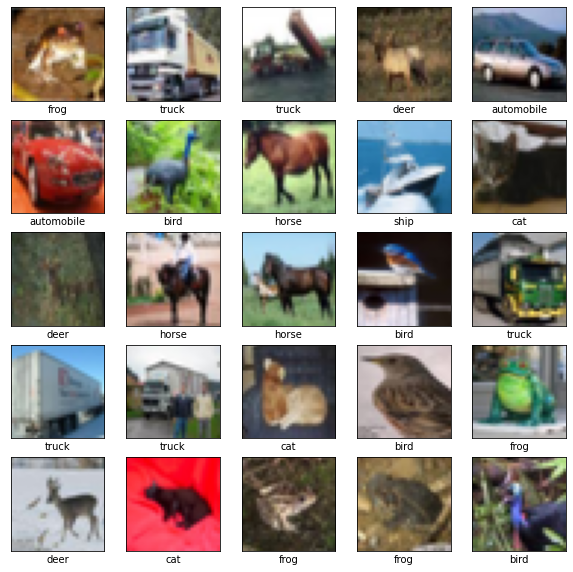

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##a. [10%] Build a CNN model to extract features and train a classifier on extracted features. The
size of the input is (32x32x3) and the suggested architecture of your CNN is as follows:
Conv(16,3x3), Relu, Conv(32,3x3), Relu, Conv(64,3x3), 2FC, and Softmax(4) (10%)

In [ ]:
model = models.Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               21632500  
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

## b. [5%] Test your trained model to perform a 4-class classification problems (automobile, cat, dog, and truck).

Untuk test data yang diminta soal maka ganya dibutuhkan 4 class yakni automobile, cat, dog, dan truck (index 1,3,5,9)

In [ ]:
# mendapatkan seluruh data dengan index 1,3,5,9 dari data train dan test
a,_ = np.where((train_labels==1) |(train_labels==3) | (train_labels==5) |(train_labels==9) ) 
b,_ = np.where((test_labels==1) |(test_labels==3) | (test_labels==5) |(test_labels==9) ) 

In [ ]:
X_train  = np.reshape(train_images[a],(len(a),32,32,3))
Y_train = np.reshape(train_labels[a],(len(a),1))

In [ ]:
X_test = np.reshape(test_images[b],(len(b),32,32,3))
Y_test = np.reshape(test_labels[b],(len(b),1))

Sehingga gambaran data yang didapatkan

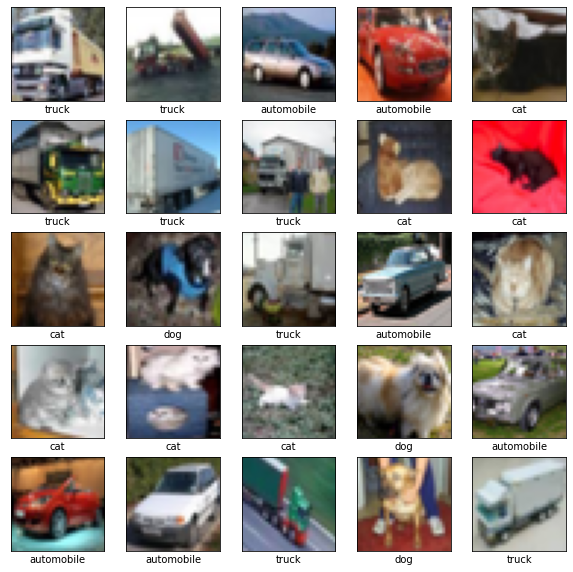

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
625/625 [==============================] - 224s 358ms/step - loss: 0.0727 - accuracy: 0.9764 - val_loss: 1.5131 - val_accuracy: 0.7393
Epoch 2/10
625/625 [==============================] - 216s 346ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 1.3908 - val_accuracy: 0.7253
Epoch 3/10
625/625 [==============================] - 214s 343ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 1.2740 - val_accuracy: 0.7418
Epoch 4/10
625/625 [==============================] - 218s 349ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 1.5109 - val_accuracy: 0.7455
Epoch 5/10
625/625 [==============================] - 218s 349ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 1.6060 - val_accuracy: 0.7360
Epoch 6/10
625/625 [==============================] - 216s 346ms/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 1.4318 - val_accuracy: 0.7303
Epoch 7/10
625/625 [==============================] - 218s 348ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 1.5874 -

## C. [5%] Illustrate your classification results using a confusion matrix and report classification accuracy of your classifier

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

125/125 - 8s - loss: 1.5385 - accuracy: 0.7360


In [ ]:
print(test_acc)

0.7360000014305115


Akurasi model ini sudah cukup baik berada di sekitar 73-74% akurasi dapat ditingkatkan dengan menambahkan jumlah epoch

Confusion matrix, without normalization
[[860  39  18  83]
 [ 24 636 295  45]
 [ 17 280 687  16]
 [150  67  22 761]]


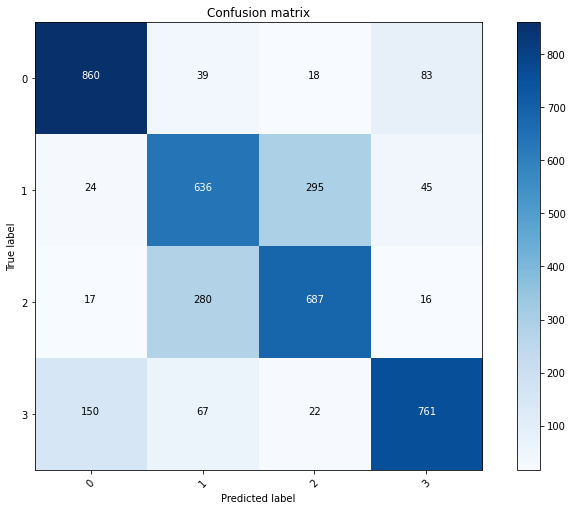

In [ ]:

from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(4)))

#3. [20%] You are required to find the location of an object (test1 and test2 images, Dataset_P3) in thecollage image using one of your favorite local features (SIFT, SURF, ORB, etc). The tasks in chronological order are as follows:

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
test1 = cv2.imread("gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P3/test1.jpeg")
test2 = cv2.imread("gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P3/test2.jpeg")
collage = cv2.imread("gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P3/collage.jpg")

In [3]:
test1G = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
test2G = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)
collageG = cv2.cvtColor(collage, cv2.COLOR_BGR2GRAY)

##a. [7.5%] Find keypoints in the images and plot the keypoint matches. Show true and false matches with different color

Untuk menggunakan surf perlu python contrib versi 3.4.2.16

In [4]:
!pip install opencv-contrib-python==3.4.2.16

In [4]:
surf = cv2.xfeatures2d.SURF_create()

In [5]:
kp1,desc1 = surf.detectAndCompute(test1G, None)
kp2,desc2 = surf.detectAndCompute(test2G, None)
kp,desc = surf.detectAndCompute(collageG, None)

In [6]:
indexP = dict(algorithm = 0)
searchP = dict(checks = 5000)
flann = cv2.FlannBasedMatcher(indexP, searchP)

In [7]:
match1 = flann.knnMatch(desc1, desc, 2)
matchesMask1 = []
matches1=[]
for i in range(len(match1)):
  matchesMask1.append([0,0])
for idx, (FB, SB) in enumerate(match1):
 if FB.distance<0.7*SB.distance:
  matchesMask1[idx] = [1,0]

In [8]:
match2 = flann.knnMatch(desc2, desc, 2)
matchesMask2 = []
matches2 = []
for i in range(len(match2)):
  matchesMask2.append([0,0])
for idx, (FB, SB) in enumerate(match2):
 if FB.distance<0.7*SB.distance:
  matchesMask2[idx] = [1,0]

Match berwarna hijau dan false match merah

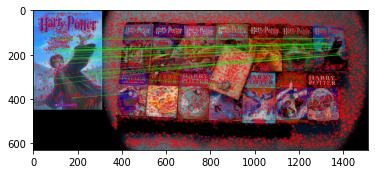

In [18]:
res1 = cv2.drawMatchesKnn(
 test1,
 kp1,
 collage,
 kp,
 match1,
 None,
 matchColor = [0, 255, 0],
 singlePointColor = [255, 0 ,0],
 matchesMask = matchesMask1)
plt.imshow(res1)
plt.show()

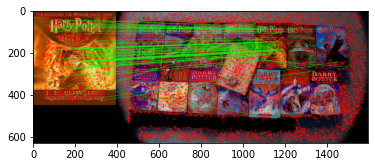

In [19]:
res2 = cv2.drawMatchesKnn(
 test2,
 kp2,
 collage,
 kp,
 match2,
 None,
 matchColor = [0, 255, 0],
 singlePointColor = [255, 0 ,0],
 matchesMask = matchesMask2)
plt.imshow(res2)
plt.show()

## b. [7.5%] Using Direct Linear Transformation algorithm, find the homography matrix for the test images

In [20]:
for m, n in match1: 
  if(m.distance < 0.7*n.distance):matches1.append(m)

In [21]:
for m, n in match2: 
  if(m.distance < 0.7*n.distance):matches2.append(m)

In [34]:
def findHomography(image_1_kp, image_2_kp, matches):
    image_1_points = np.zeros((len(matches), 1, 2), dtype=np.float32)
    image_2_points = np.zeros((len(matches), 1, 2), dtype=np.float32)

    for i in range(0,len(matches)):
        image_1_points[i] = image_1_kp[matches[i].queryIdx].pt
        image_2_points[i] = image_2_kp[matches[i].trainIdx].pt


    homography, mask = cv2.findHomography(image_1_points, image_2_points, cv2.RANSAC, ransacReprojThreshold=5.0)

    return homography

In [35]:
H1 = findHomography(kp1,kp,matches1)
H1

array([[ 4.39748893e-01, -7.71830904e-02,  9.51611797e+02],
       [ 1.17232818e-02,  4.24612043e-01,  6.97422883e+01],
       [-1.46399336e-05, -9.77945093e-05,  1.00000000e+00]])

In [36]:
H2 = findHomography(kp2,kp,matches2)
H2

array([[ 3.61054861e-01, -3.33490951e-01,  6.30118519e+02],
       [-3.30769246e-02,  4.49128356e-01,  5.65775926e+01],
       [-2.31572220e-04, -4.44790231e-04,  1.00000000e+00]])

##c. [5%] Find corners of the bounding box for the test images in the collage image and draw their bounding box. Show your matching result for both test images.


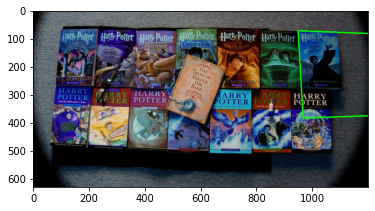

In [28]:
h, w = collageG.shape
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2) 
dst = cv2.perspectiveTransform(pts, H1) 

boundingBox1= cv2.polylines(collage, [np.int32(dst)], True, (0, 255, 0), 3) 
plt.imshow(boundingBox1)
plt.show()

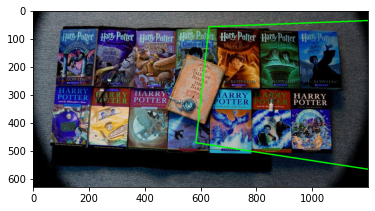

In [38]:
plt.cla()
# clear plt
h, w = collageG.shape
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2) 
dst2 = cv2.perspectiveTransform(pts, H2) 

boundingBox2= cv2.polylines(collage, [np.int32(dst2)], True, (0, 255, 0), 3) 
plt.imshow(boundingBox2)
plt.show()

# 4. [20%] Using the images of Taj Mahal (Dataset_P4) as it is shown below, create one panoramic image using image stitching technique. Clearly write the algorithm you followed, implement your respective algorithm in python notebook and show the final combined image. You may need to install imutils python library 

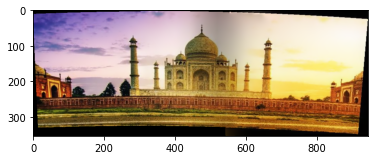

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

imagePath = 'gdrive/My Drive/20210122021554_COMP7116_FIN_RCQuestion/COMP7116_Computer Vision_REGULER & GLOBAL_UAS/COMP7116_Computer Vision_REGULER & GLOBAL_UAS - Dataset/Dataset_P4'
images = []
for img in os.listdir(imagePath):
  images.append(imagePath+'/'+img)

imageList = []
for img in images:
  image = cv2.imread(img)
  imageList.append(image)
stitcher = cv2.Stitcher.create()
(status, result) = stitcher.stitch(imageList)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(result)
plt.show()

#5. [20%] You are expected to implement a face detection algorithm using HOG features with linear SVM as a classifier in python notebook. So your detailed tasks will be as follows:


#a. [5%] Of your choice, build a dataset containing P positive images (face) and N negative images (non-face) where N>>P and save several face images for later use (testing the detector).

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive = faces.images
positive.shape

(13233, 62, 47)

Beberapa data muka

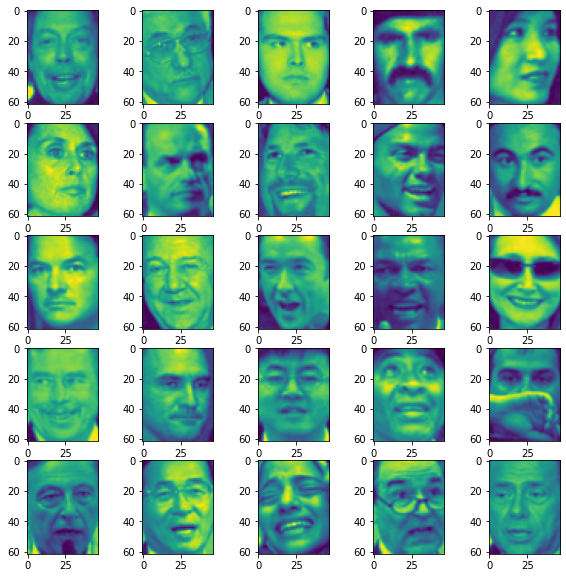

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(positive[i])
plt.show()

Untuk data negatif


In [ ]:
from skimage import *
from skimage.color import rgb2gray

imgs_to_use = ['camera', 'text', 'coins', 'moon','page', 'clock', 'immunohistochemistry','chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

In [ ]:
from sklearn.feature_extraction.image import PatchExtractor
from skimage import data, transform
import numpy as np

def extract_patches(img, N, scale=1.0, patch_size=positive[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative.shape

(30000, 62, 47)

Beberapa data non - muka

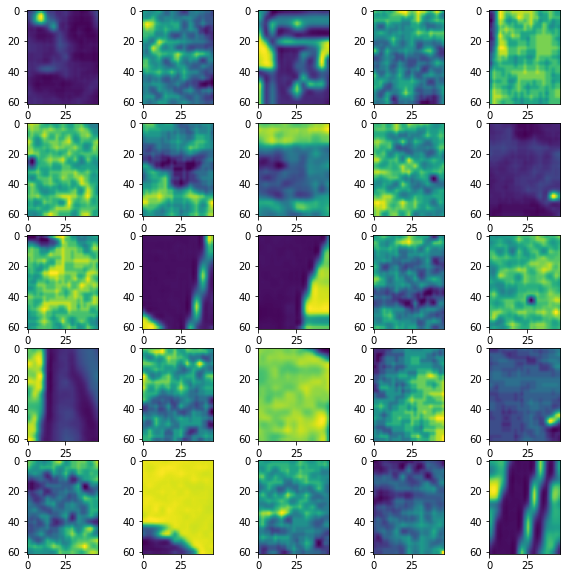

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(negative[i])
plt.show()

## b. [7.5%] Extract the HOG features of both positive and negative images and train using linearSVM. Once the training is completed, save the model.

In [ ]:
from itertools import chain
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure
from sklearn.feature_extraction.image import PatchExtractor
import matplotlib.pyplot as plt
X_train = np.array([hog(im) for im in chain(positive,negative)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive.shape[0]] = 1

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train)

array([0.94772754, 0.97189777, 0.97236036, 0.97490169, 0.97374508])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9884347203194052

In [ ]:
grid.best_params_

{'C': 1.0}

In [ ]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

##C. [7.5%] Test the model using sliding window, you may get overlapping windows surrounding the face image. If so, how do you get rid of these overlapping windows. Demonstrate the results after the improvement.

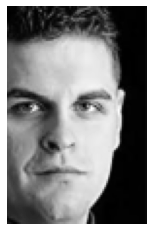

In [ ]:
from skimage import io
test_image = io.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvt8d-pqkRVQGdGPw-uEhwYBjHAfIhmtSTWQ&usqp=CAU')
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [ ]:
def sliding_window(img, patch_size=positive[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch


In [ ]:
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([hog(patch) for patch in patches])
patches_hog.shape

(125, 1215)

In [ ]:
labels = model.predict(patches_hog)
labels.sum()

19.0

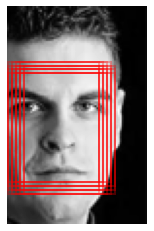

In [ ]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))